# Stephen Curry Shooting Data Visualization

## Data Explanation

데이터는 kaggle 사이트(https://www.kaggle.com/dansbecker/nba-shot-logs) 에 업로드되어있는 NBA 선수들의 2014-2015 시즌 슈팅 및 수비 스탯 csv 데이터에서 골든스테이트 워리어스의 스테픈 커리 선수의 데이터만을 사용하였습니다. <br>
original data의 21개의 column 중 7개의 column만 추출했습니다.

SHOT_CLOCK : 슈팅 시 남은 샷 클락 (초) <br>
DRIBBLES : 공을 잡은 후 슈팅 전까지의 드리블 횟수 <br>
TOUCH_TIME : 공을 잡은 후 공 소유 시간 (초) <br>
SHOT_DIST : 슈팅 위치와 골대 간의 거리 <br>
CLOSE_DEF_DIST : 슈터와 가장 인접한 수비수 간의 거리 <br>
FGM : 득점에 성공했으면 1, 실패했으면 0 <br>
PTS : 득점된 점수 (0/2/3)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data=np.genfromtxt("data_stephencurry.csv",delimiter=',')
data=data[:,:-1] #delete empty column
print(np.shape(data))

(969, 7)


In [25]:
data_DF=DataFrame(data, columns=["Shot_Clock", "Dribbles", "Touch_Time", "Shot_Distance", "Close_Def_Distance", "FGM", "PTS"])
data_DF=data_DF.dropna(axis=0) #delete nan data
data_DF.shape

(941, 7)

In [26]:
data_DF.head()

,Shot_Clock,Dribbles,Touch_Time,Shot_Distance,Close_Def_Distance,FGM,PTS
1,16.3,2.0,4.0,8.0,2.5,0.0,0.0
2,16.6,0.0,2.4,25.9,3.0,0.0,0.0
3,11.0,0.0,0.9,23.8,7.5,1.0,3.0
4,18.5,2.0,3.4,27.5,6.4,1.0,3.0
6,3.0,1.0,1.5,25.1,4.8,0.0,0.0


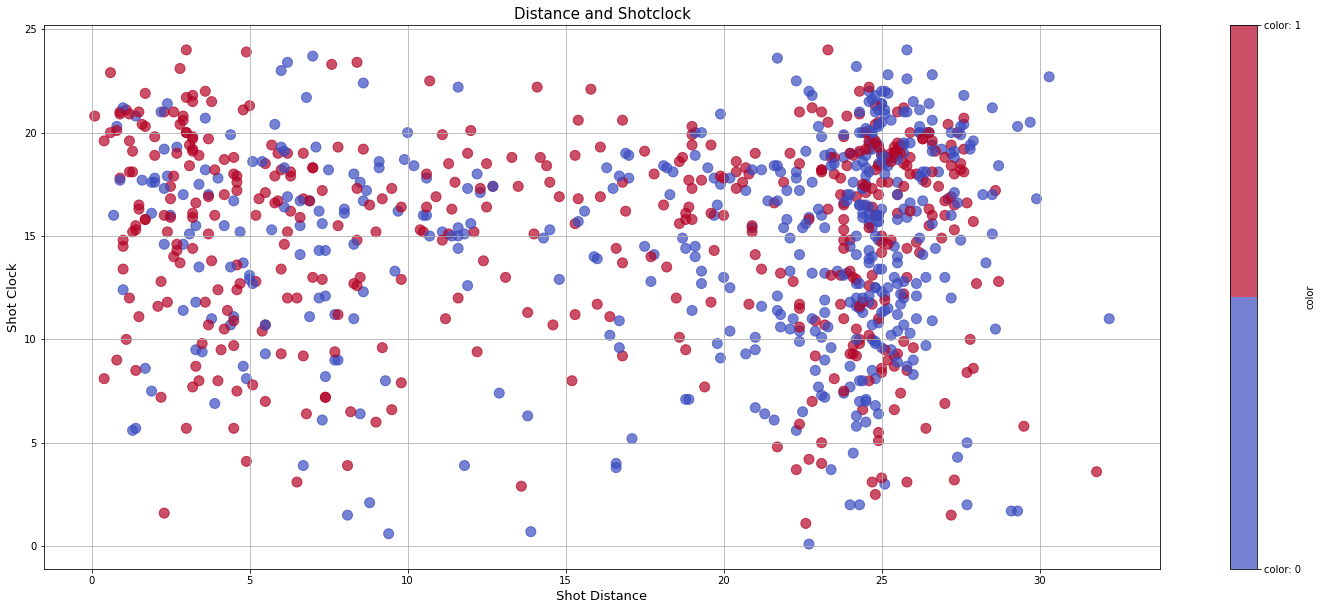

In [52]:
#distance and shotclock
plt.figure(figsize=(25,10))
plt.title("Distance and Shotclock", fontsize=15)
plt.scatter(data_DF["Shot_Distance"], data_DF["Shot_Clock"], s=100, c=data_DF["FGM"], cmap=plt.cm.get_cmap('coolwarm', 2), alpha=0.7)
plt.colorbar(ticks=range(2), format='color: %d', label='color')
plt.xlabel("Shot Distance", fontsize=13)
plt.ylabel("Shot Clock", fontsize=13)
plt.grid()
plt.show()

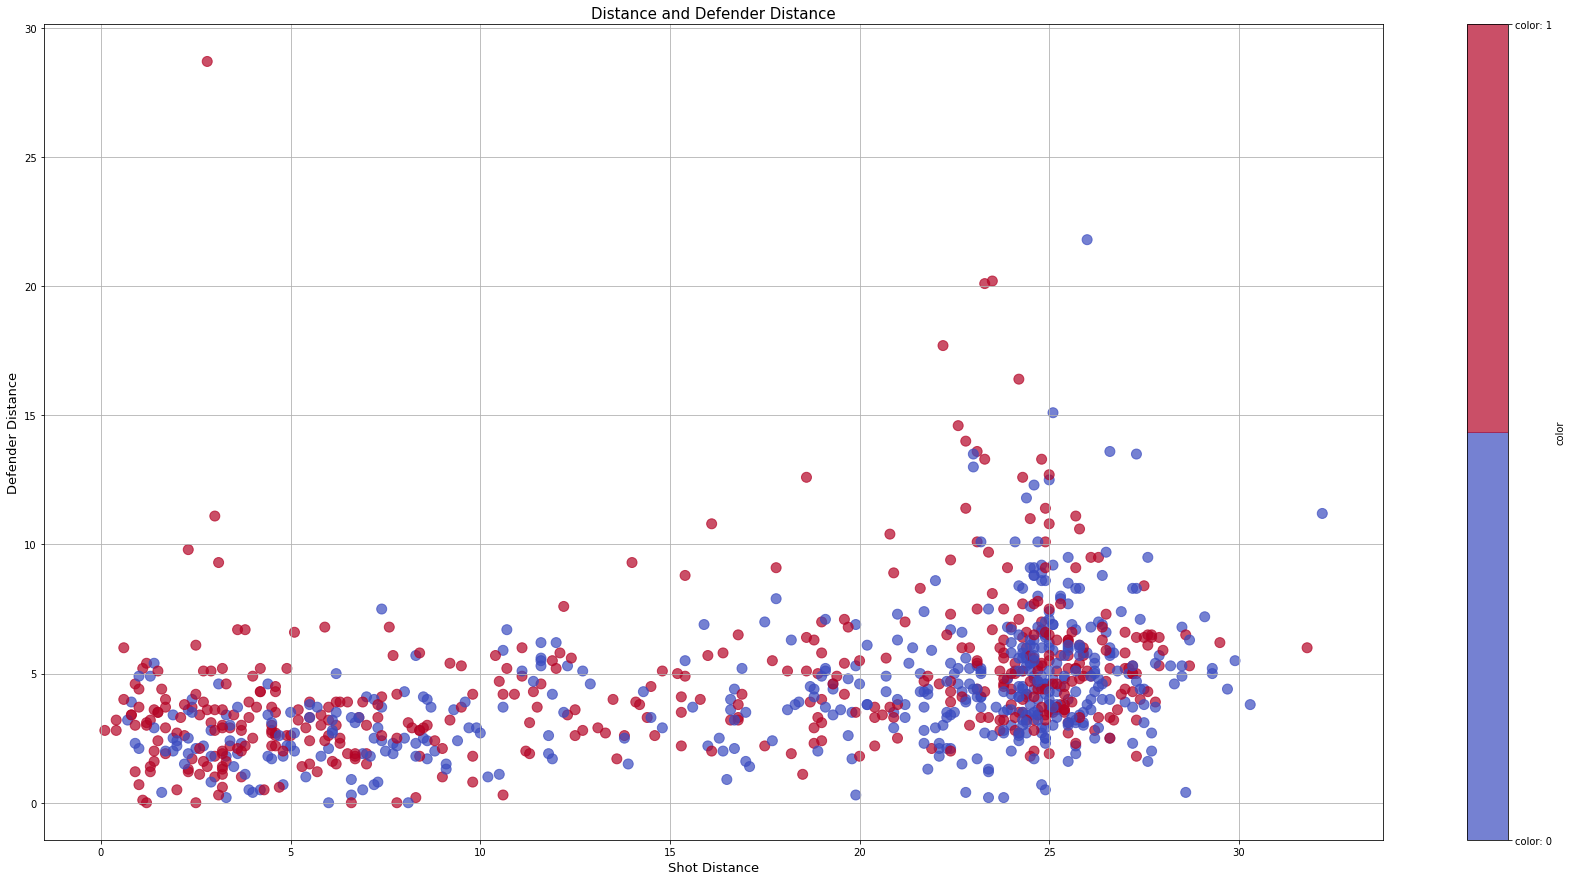

In [54]:
#shot distance and defender distance
plt.figure(figsize=(30,15))
plt.title("Distance and Defender Distance", fontsize=15)
plt.scatter(data_DF["Shot_Distance"], data_DF["Close_Def_Distance"], s=100, c=data_DF["FGM"], cmap=plt.cm.get_cmap('coolwarm', 2), alpha=0.7)
plt.colorbar(ticks=range(2), format='color: %d', label='color')
plt.xlabel("Shot Distance", fontsize=13)
plt.ylabel("Defender Distance", fontsize=13)
plt.grid()
plt.show()

In [74]:
#separate with FGM
is_made = data_DF["FGM"] == 1
isnot_made = data_DF["FGM"] == 0
shot_success = data_DF[is_made]
shot_fail = data_DF[isnot_made]

shot_success

,Shot_Clock,Dribbles,Touch_Time,Shot_Distance,Close_Def_Distance,FGM,PTS
3,11.0,0.0,0.9,23.8,7.5,1.0,3.0
4,18.5,2.0,3.4,27.5,6.4,1.0,3.0
11,13.1,0.0,0.9,23.7,6.0,1.0,3.0
12,16.6,7.0,7.2,27.7,6.5,1.0,3.0
13,18.0,0.0,1.1,27.3,1.8,1.0,3.0
...,...,...,...,...,...,...,...
955,20.4,8.0,4.8,1.6,4.4,1.0,2.0
961,19.0,6.0,5.2,25.4,4.2,1.0,3.0
964,19.7,7.0,5.1,3.2,2.9,1.0,2.0
965,3.1,12.0,8.7,6.5,1.9,1.0,2.0


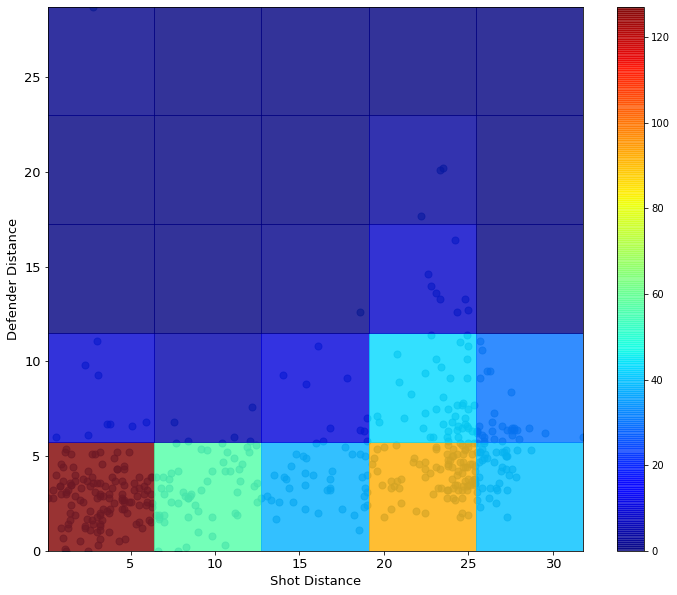

In [77]:
#density with color

plt.figure(figsize=(12,10))
plt.scatter(shot_success["Shot_Distance"], shot_success["Close_Def_Distance"], s=50, alpha=0.6)

plt.hist2d(shot_success["Shot_Distance"], shot_success["Close_Def_Distance"], (5, 5), alpha=.8, cmap=plt.cm.jet)
        
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel("Shot Distance", fontsize=13)
plt.ylabel("Defender Distance", fontsize=13)

plt.colorbar()
plt.show()

In [100]:
#shot percentage with shot distance

data = data_DF.values
total_shot = [0 for i in range(6)]
shot_percent_dist = [0 for i in range(6)]

for i in data:
    total_shot[(int(i[3])//6)]+=1
    if i[-2] == 1:
        shot_percent_dist[(int(i[3])//6)]+=1

print(shot_percent_dist, total_shot)

for i in range(len(shot_percent_dist)):
    shot_percent_dist[i] /= total_shot[i]
    shot_percent_dist[i] *= 100
    
print(shot_percent_dist)

[127, 64, 40, 87, 145, 1] [185, 128, 69, 193, 363, 3]
[68.64864864864865, 50.0, 57.971014492753625, 45.07772020725388, 39.94490358126722, 33.33333333333333]


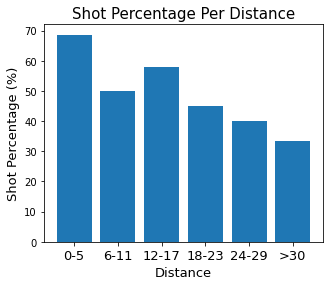

In [106]:
distance_range = ["0-5", "6-11", "12-17", "18-23", "24-29", ">30"]
index = np.arange(len(distance_range))

plt.figure(figsize=(5, 4))
plt.bar(index, shot_percent_dist)
plt.title('Shot Percentage Per Distance', fontsize=15)
plt.xlabel('Distance', fontsize=13)
plt.ylabel('Shot Percentage (%)', fontsize=13)
plt.xticks(index, distance_range, fontsize=13)
plt.show()